In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams["figure.dpi"]=300
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Fraud Check Data

In [2]:
FC=pd.read_csv("Fraud_check.csv")
FC

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

# EDA

In [3]:
FC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [4]:
FC.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

# Visualization

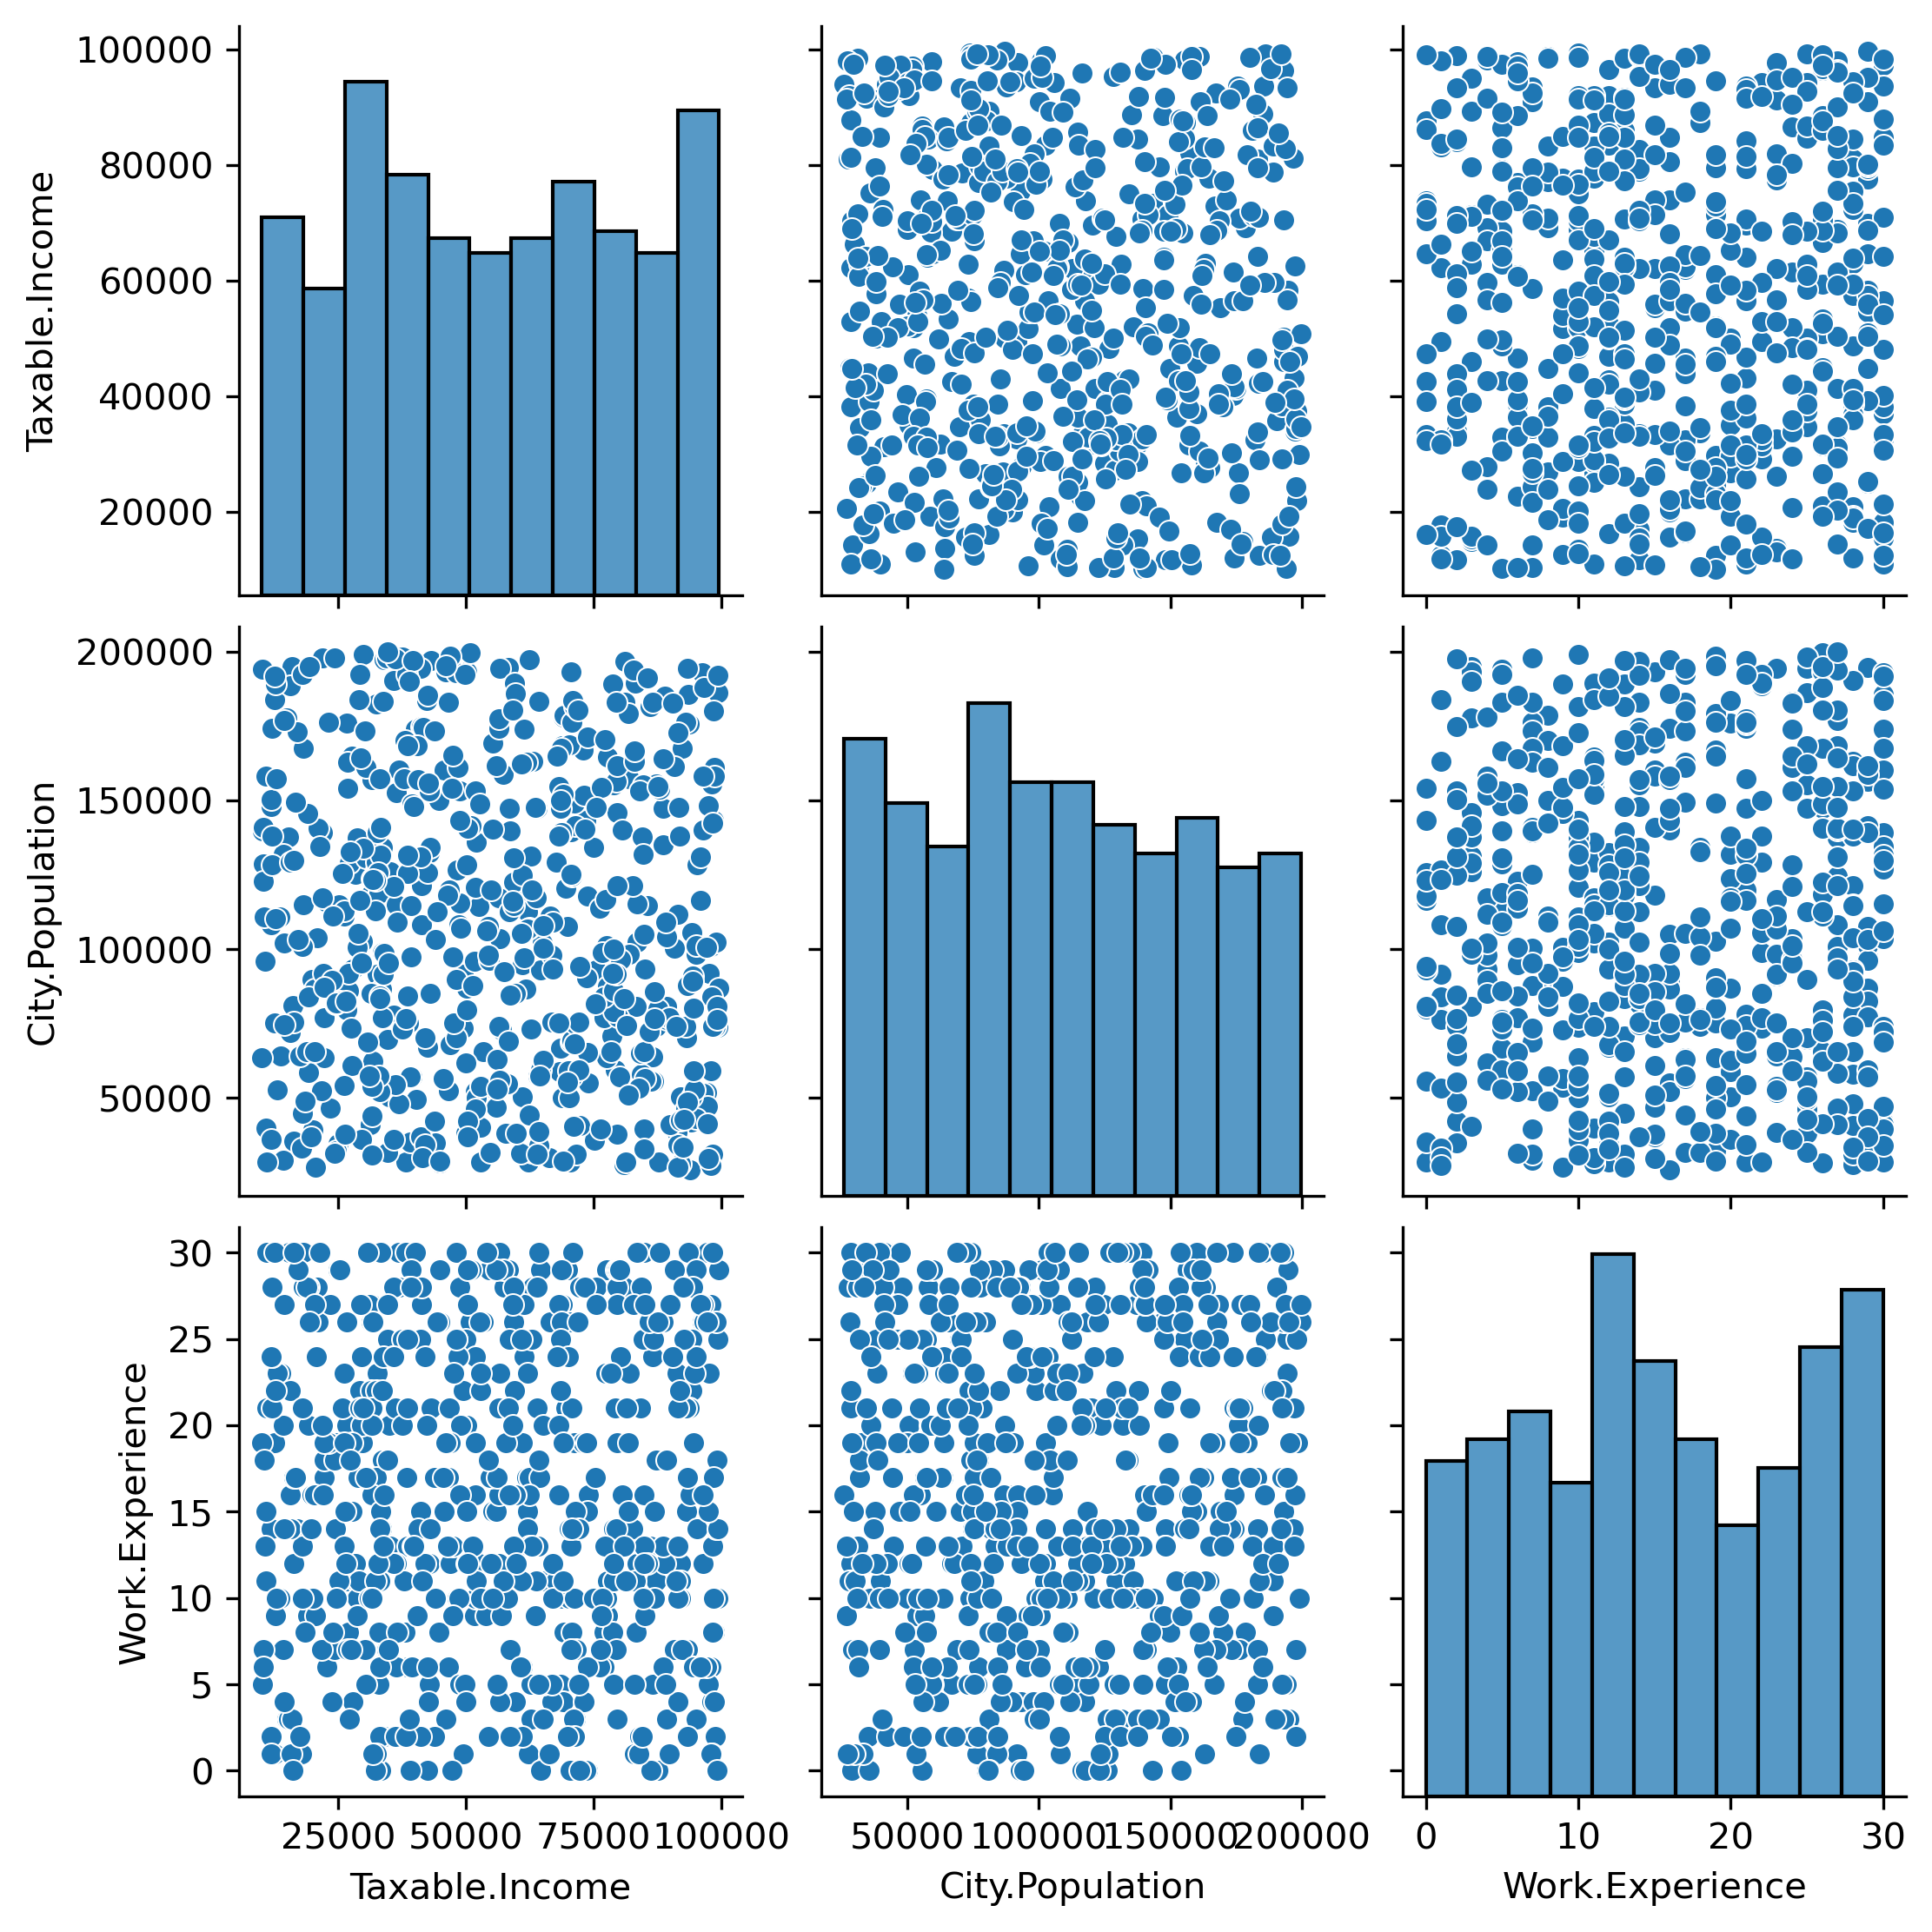

In [5]:
sns.pairplot(FC)

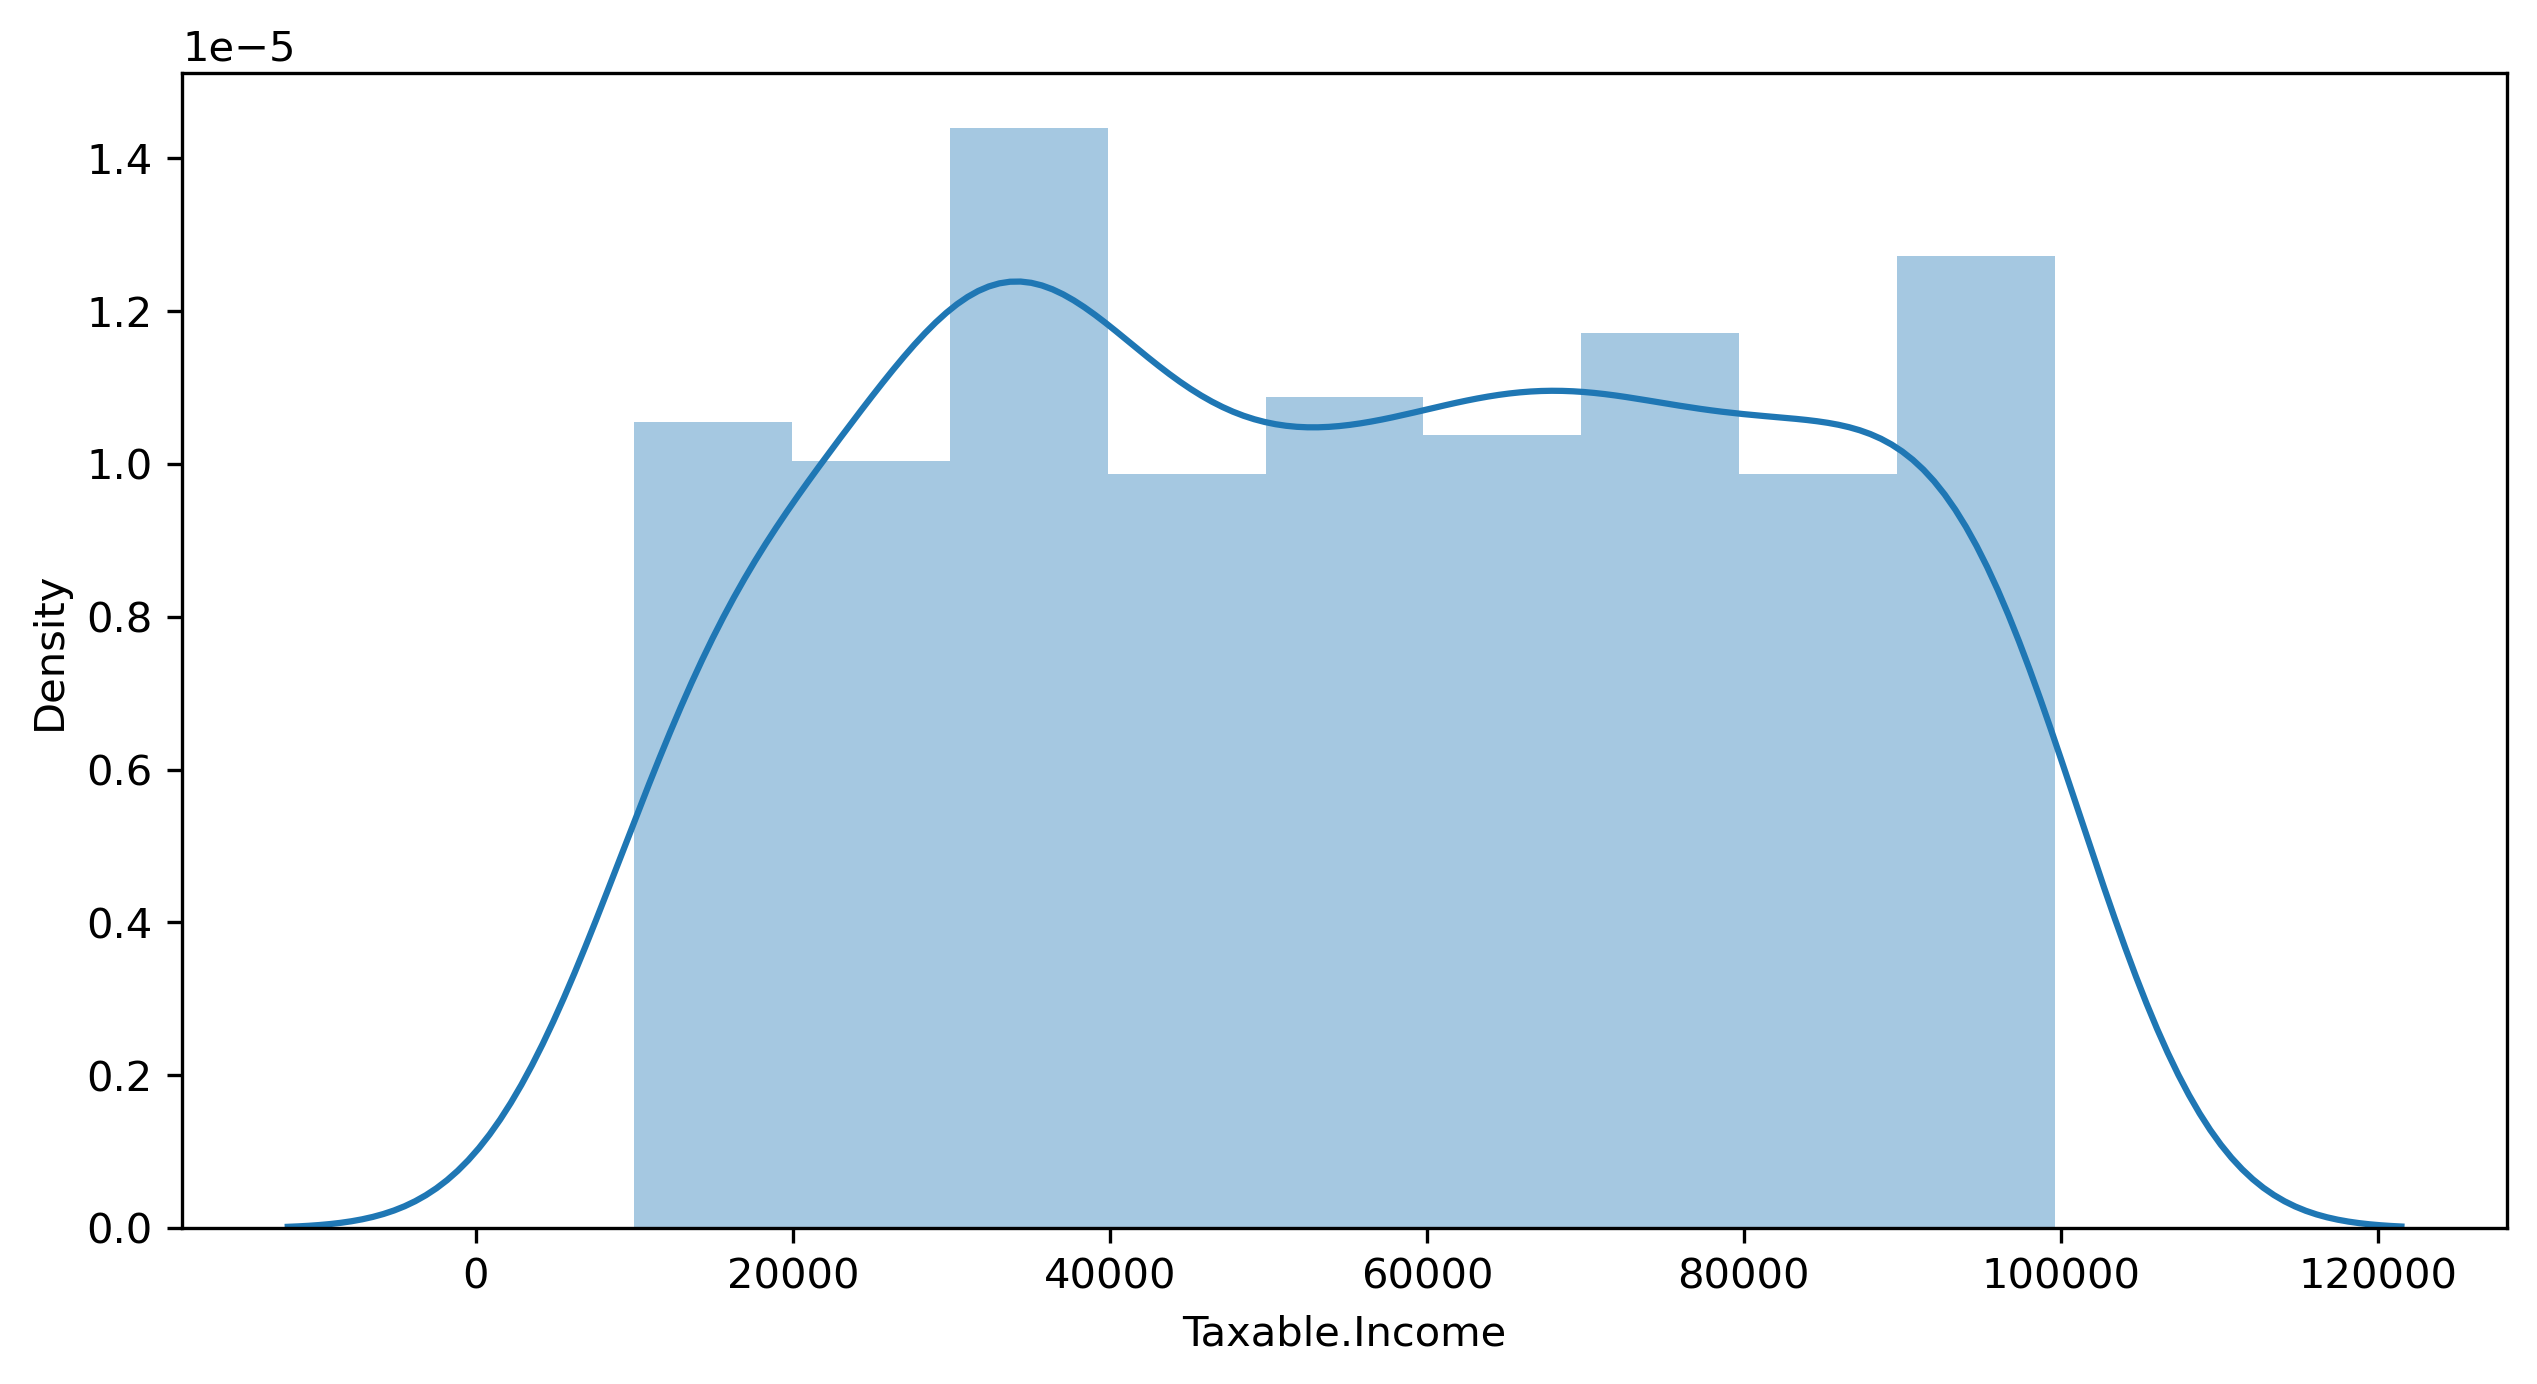

In [6]:
# Distplot of Taxable Income
sns.distplot(FC['Taxable.Income']);

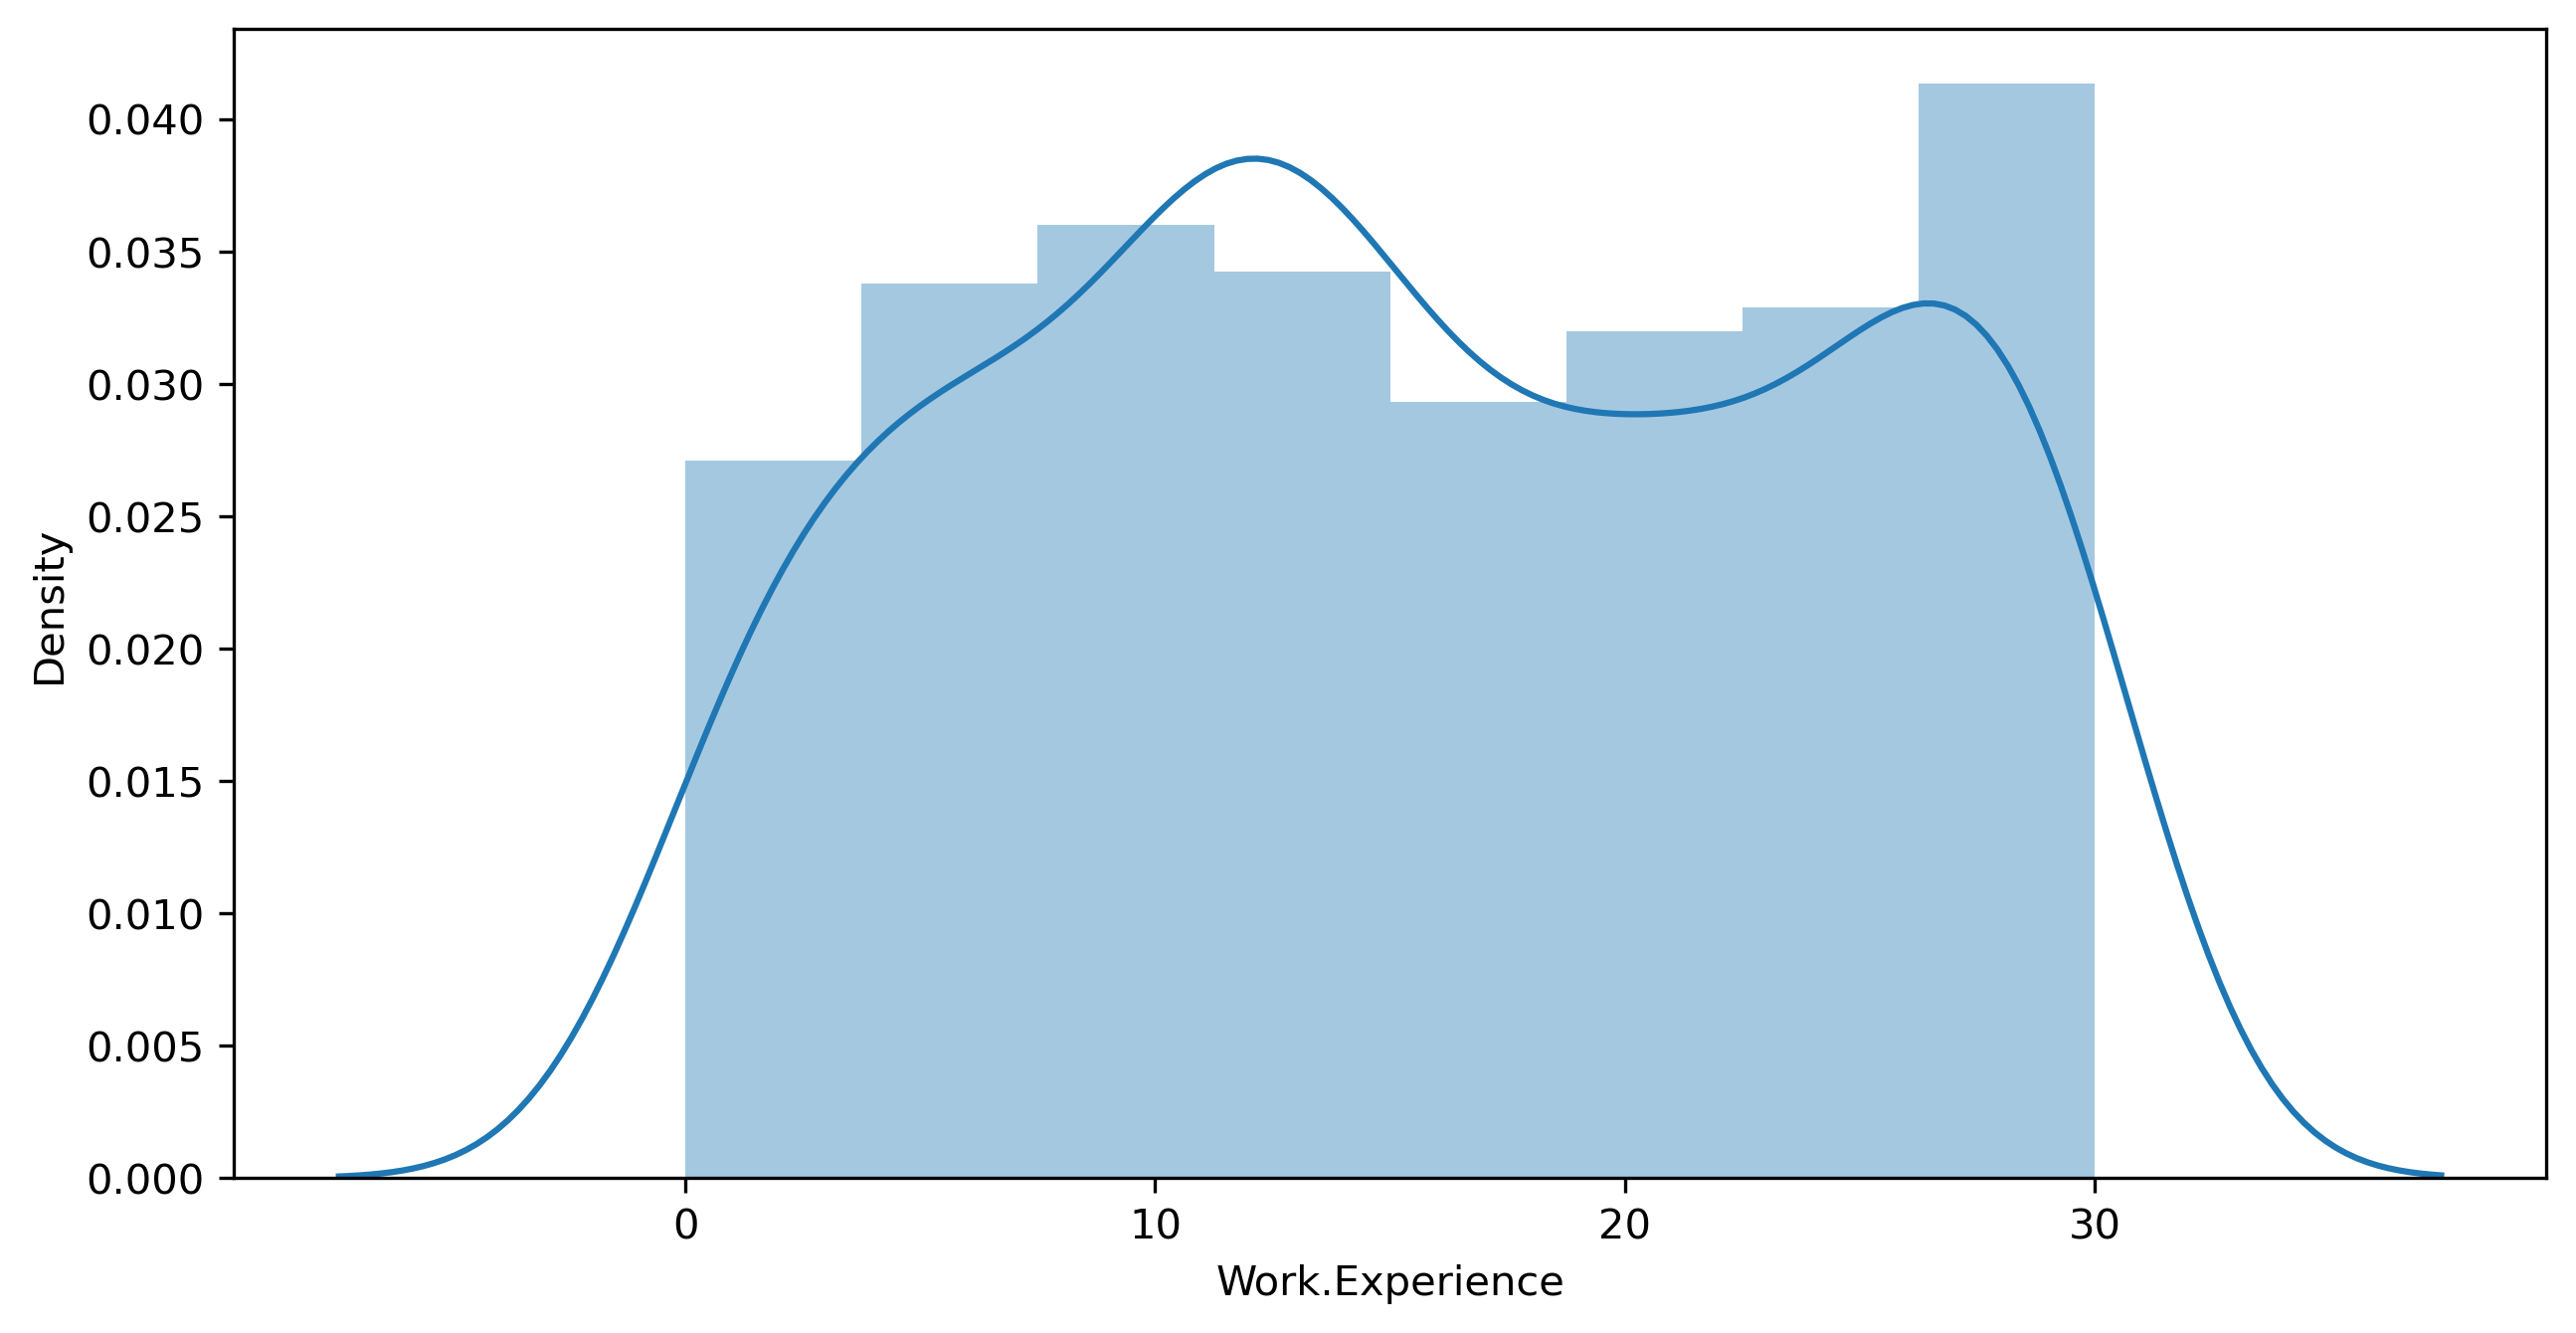

In [7]:
# Distplot of Work Experience
sns.distplot(FC['Work.Experience']);

<Axes: >

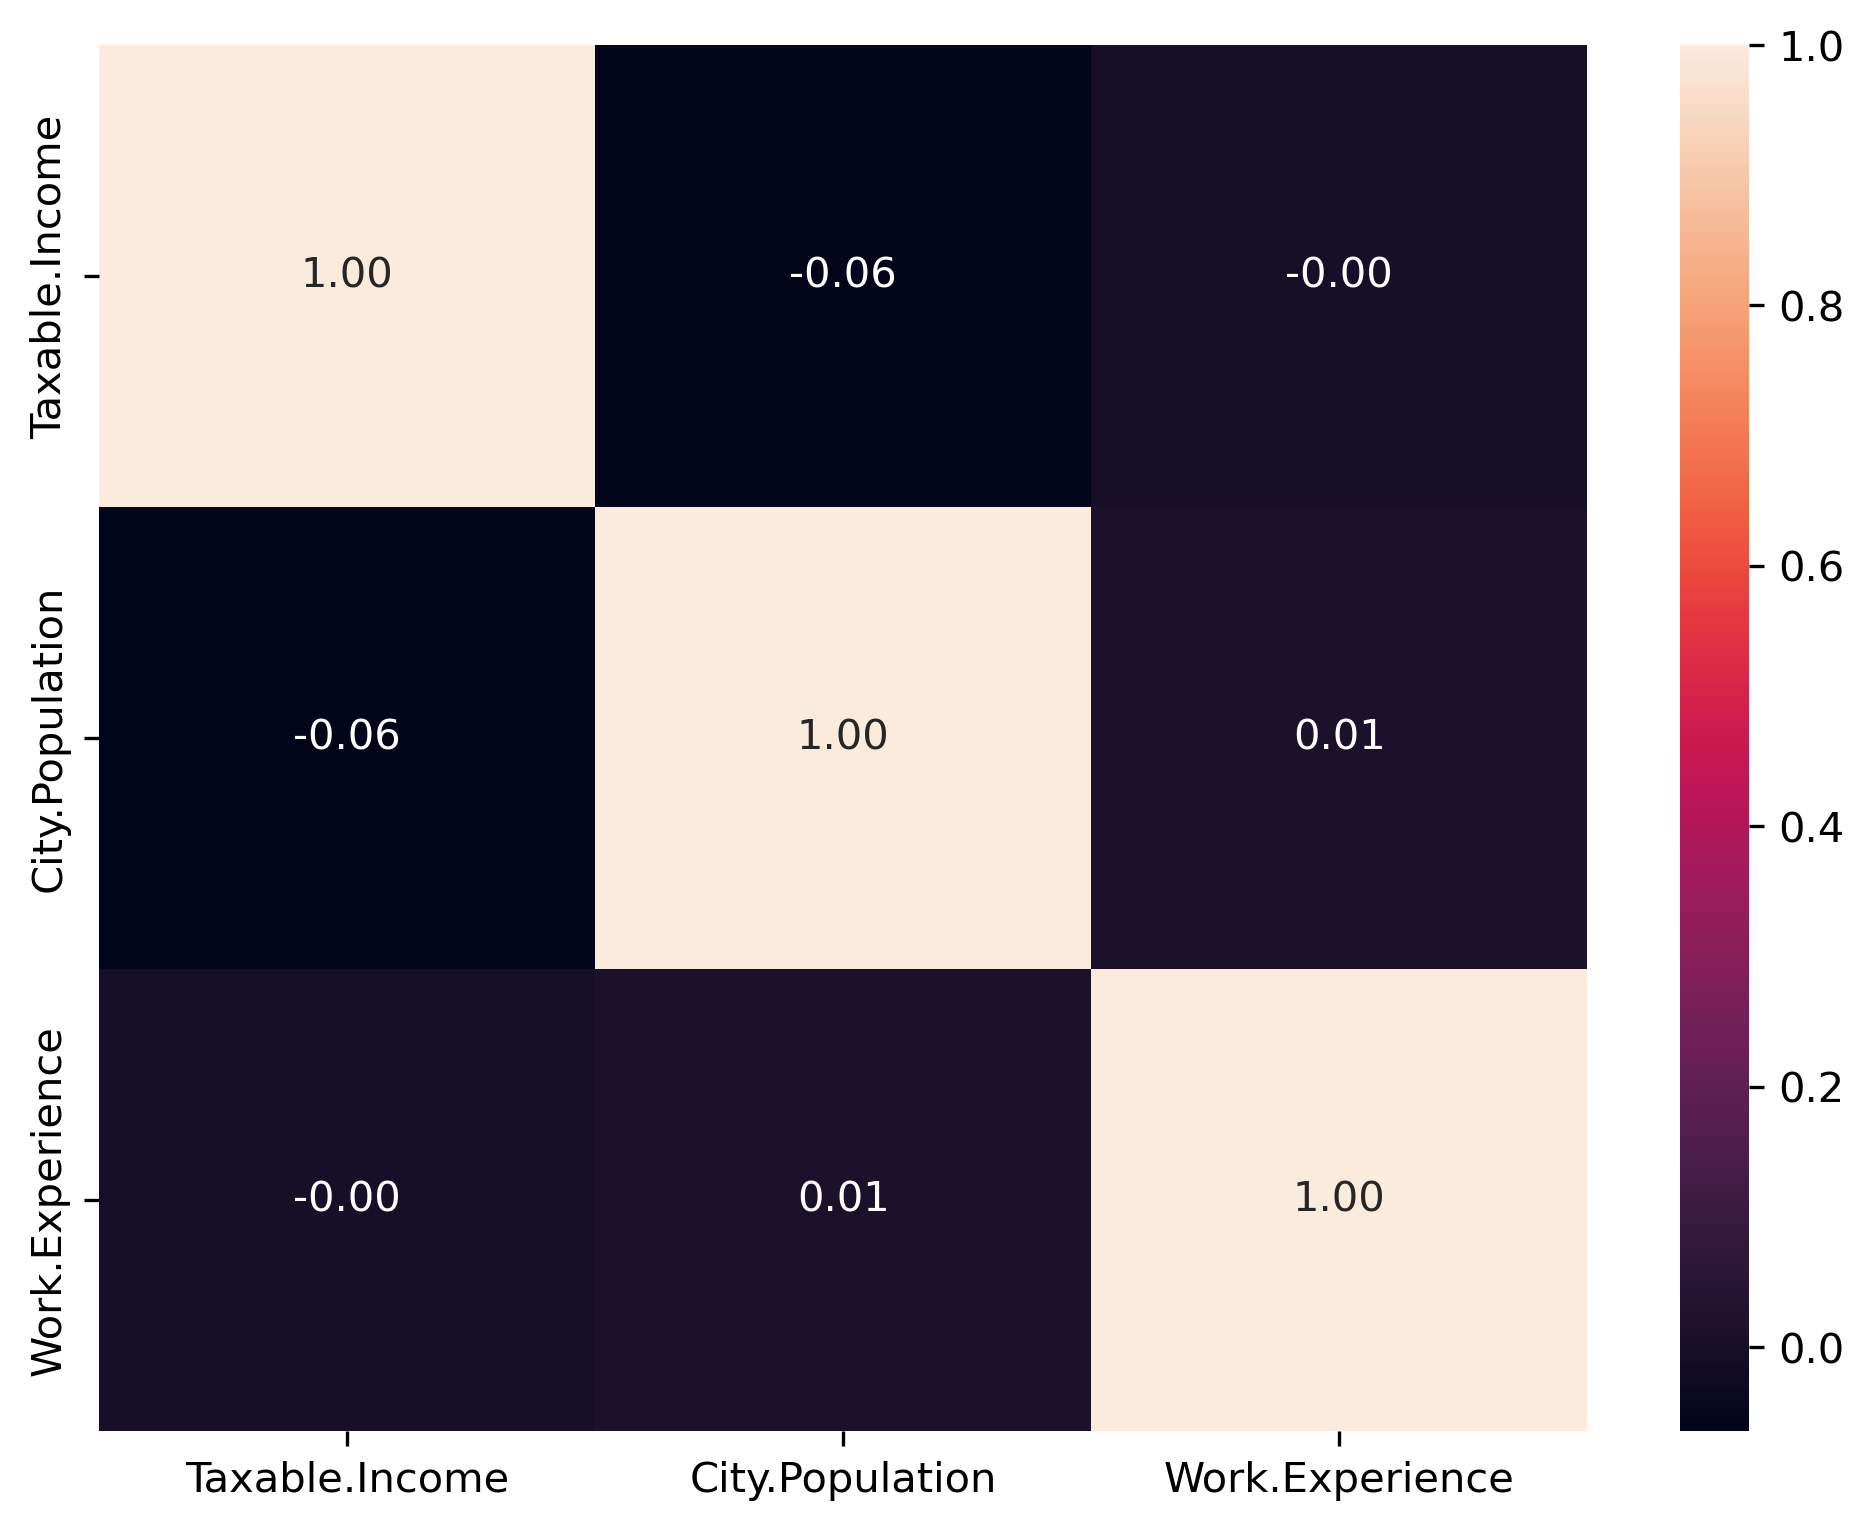

In [8]:
# Heatmap
plt.figure(figsize = (8, 6));
sns.heatmap(FC.corr(), annot=True, fmt=".2f")

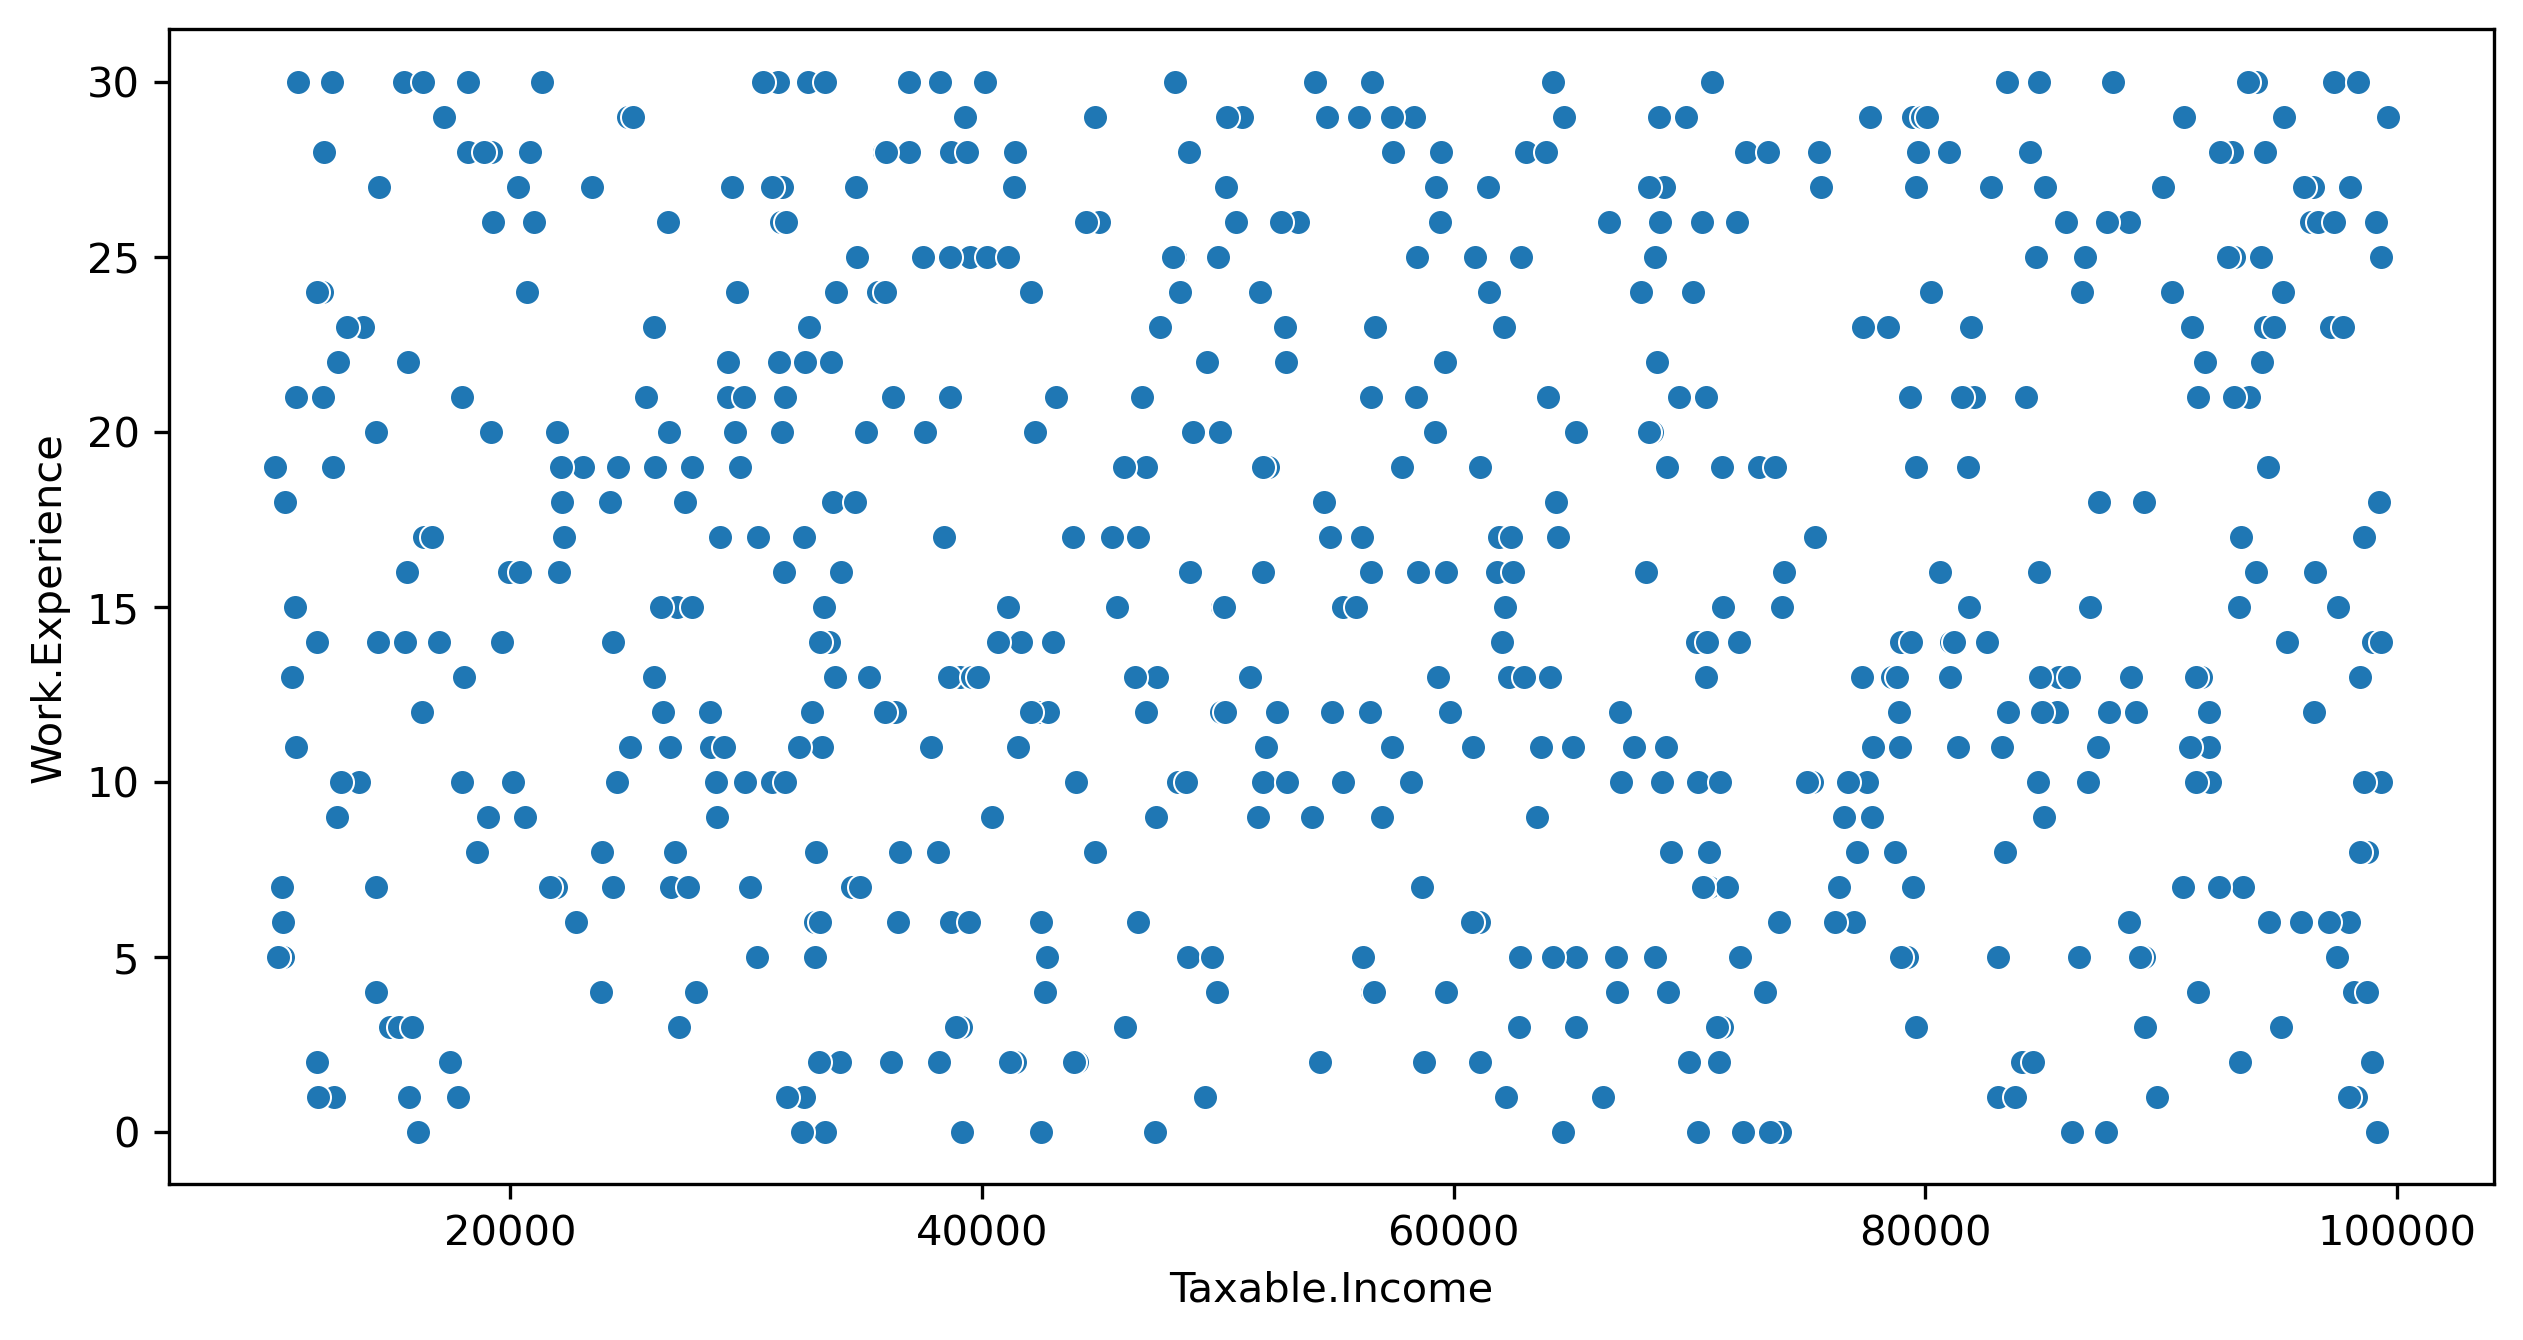

In [9]:
sns.scatterplot(x = 'Taxable.Income', y = 'Work.Experience', data = FC);

In [13]:
FC=pd.get_dummies(FC)
FC

Taxable.Income  City.Population  Work.Experience  Undergrad_NO  \
0             68833            50047               10             1   
1             33700           134075               18             0   
2             36925           160205               30             1   
3             50190           193264               15             0   
4             81002            27533               28             1   
..              ...              ...              ...           ...   
595           76340            39492                7             0   
596           69967            55369                2             0   
597           47334           154058                0             1   
598           98592           180083               17             0   
599           96519           158137               16             1   

     Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  \
0                0                        0                       0   
1                1                        1                       0   
2                0                        0                       1   
3                1                        0                       0   
4                0                        0                       1   
..             ...                      ...                     ...   
595              1                        1                       0   
596              1                        1                       0   
597              0                        1                       0   
598              1                        0                       1   
599              0                        1                       0   

     Marital.Status_Single  Urban_NO  Urban_YES  
0                        1         0          1  
1                        0         0          1  
2                        0         0          1  
3                        1         0          1  
4                        0         1          0  
..                     ...       ...        ...  
595                      0         0          1  
596                      0         0          1  
597                      0         0          1  
598                      0         1          0  
599                      0         1          0  

[600 rows x 10 columns]

In [14]:
FC['Taxable.Income'].max()

99619

In [15]:
FC['Taxable.Income'].min()

10003

In [16]:
FC['Tax']=pd.cut(FC['Taxable.Income'], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [17]:
FC

Taxable.Income  City.Population  Work.Experience  Undergrad_NO  \
0             68833            50047               10             1   
1             33700           134075               18             0   
2             36925           160205               30             1   
3             50190           193264               15             0   
4             81002            27533               28             1   
..              ...              ...              ...           ...   
595           76340            39492                7             0   
596           69967            55369                2             0   
597           47334           154058                0             1   
598           98592           180083               17             0   
599           96519           158137               16             1   

     Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  \
0                0                        0                       0   
1                1                        1                       0   
2                0                        0                       1   
3                1                        0                       0   
4                0                        0                       1   
..             ...                      ...                     ...   
595              1                        1                       0   
596              1                        1                       0   
597              0                        1                       0   
598              1                        0                       1   
599              0                        1                       0   

     Marital.Status_Single  Urban_NO  Urban_YES   Tax  
0                        1         0          1  Good  
1                        0         0          1  Good  
2                        0         0          1  Good  
3                        1         0          1  Good  
4                        0         1          0  Good  
..                     ...       ...        ...   ...  
595                      0         0          1  Good  
596                      0         0          1  Good  
597                      0         0          1  Good  
598                      0         1          0  Good  
599                      0         1          0  Good  

[600 rows x 11 columns]

In [80]:
array=FC.values
array

array([[68833, 50047, 10, ..., 0, 1, 'Good'],
       [33700, 134075, 18, ..., 0, 1, 'Good'],
       [36925, 160205, 30, ..., 0, 1, 'Good'],
       ...,
       [47334, 154058, 0, ..., 0, 1, 'Good'],
       [98592, 180083, 17, ..., 1, 0, 'Good'],
       [96519, 158137, 16, ..., 1, 0, 'Good']], dtype=object)

In [81]:
S=array[:,1:10]
T=array[:,10]

In [82]:
S

array([[50047, 10, 1, ..., 1, 0, 1],
       [134075, 18, 0, ..., 0, 0, 1],
       [160205, 30, 1, ..., 0, 0, 1],
       ...,
       [154058, 0, 1, ..., 0, 0, 1],
       [180083, 17, 0, ..., 0, 1, 0],
       [158137, 16, 1, ..., 0, 1, 0]], dtype=object)

In [83]:
T

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

# Random Forest Classification

In [84]:
kfold=KFold(n_splits=8, random_state=27, shuffle=True)

In [85]:
model1=RandomForestClassifier(n_estimators=82, max_features=4)
model1

RandomForestClassifier(max_features=4, n_estimators=82)

In [86]:
fit1=model1.fit(S,T)
pred=fit1.predict(S)
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [87]:
result=cross_val_score(model1,S,T,cv=kfold)
result

array([0.78666667, 0.73333333, 0.74666667, 0.73333333, 0.8       ,
       0.76      , 0.77333333, 0.69333333])

In [88]:
result.mean()*100

75.33333333333334

# Company Data

In [118]:
company=pd.read_csv('Company_Data.csv')
company

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

# EDA

In [119]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [120]:
company.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

# Visualization

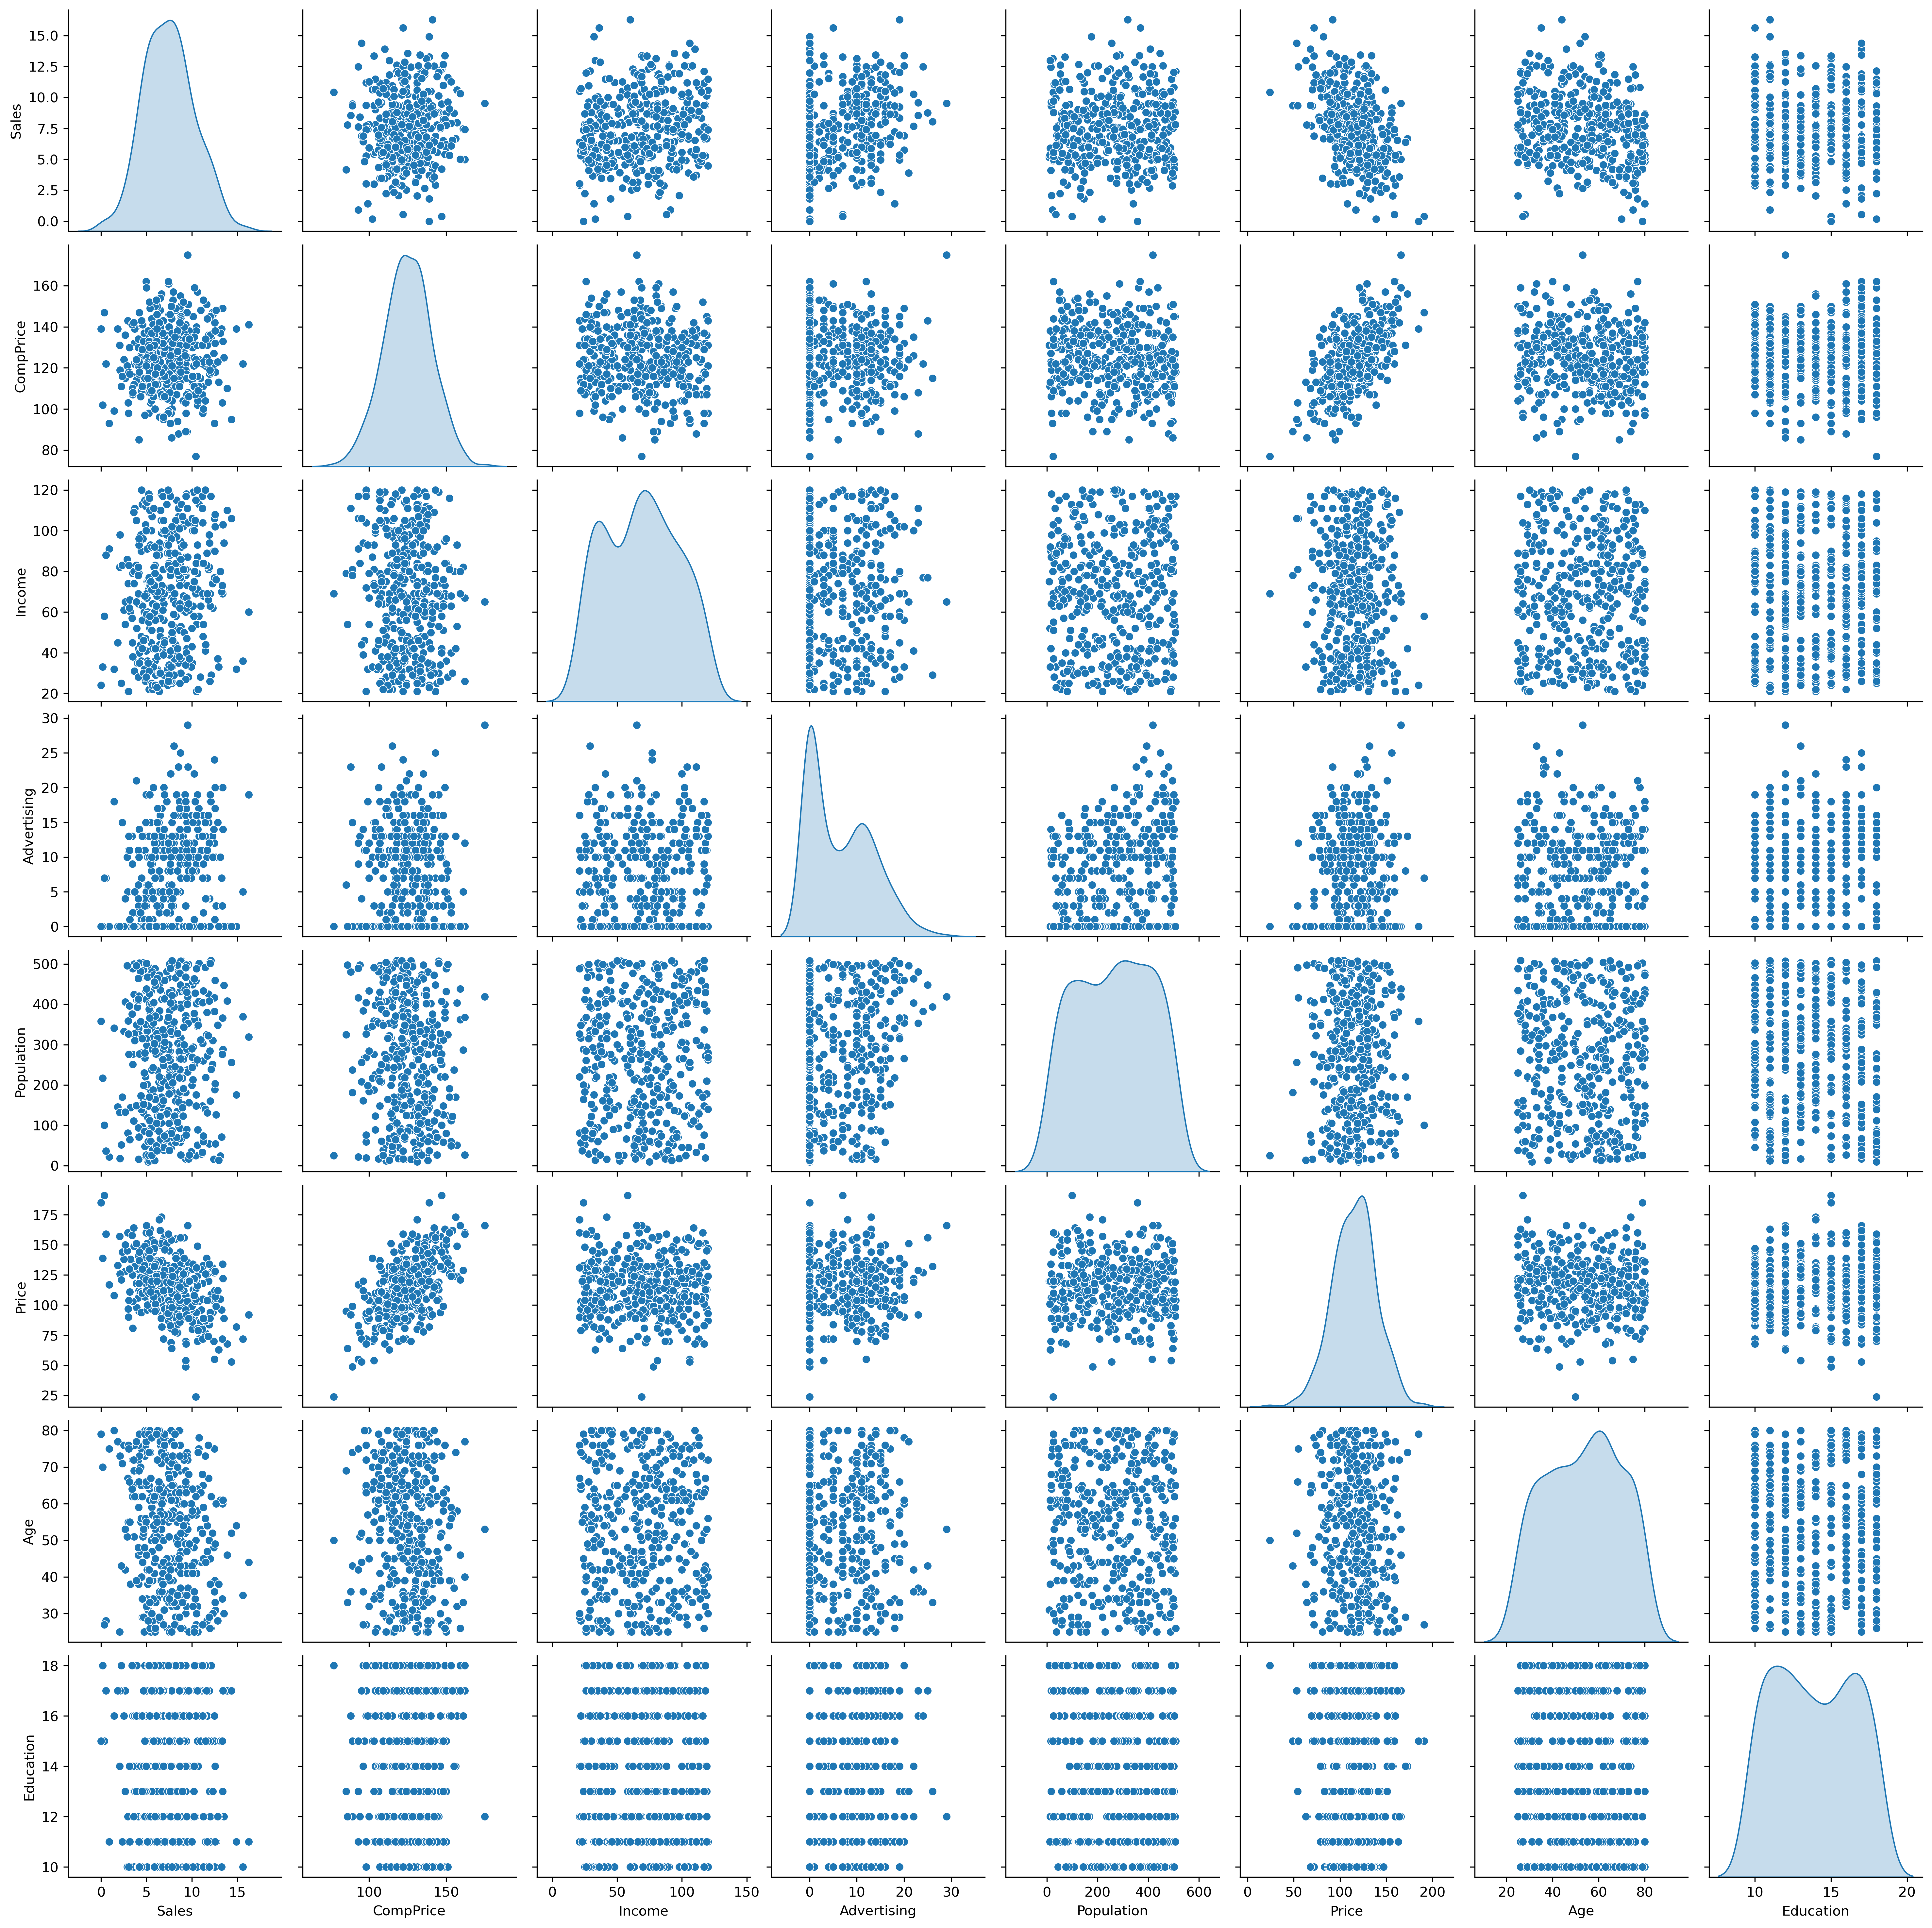

In [121]:
# Pair potting
sns.pairplot(company, diag_kind='kde');

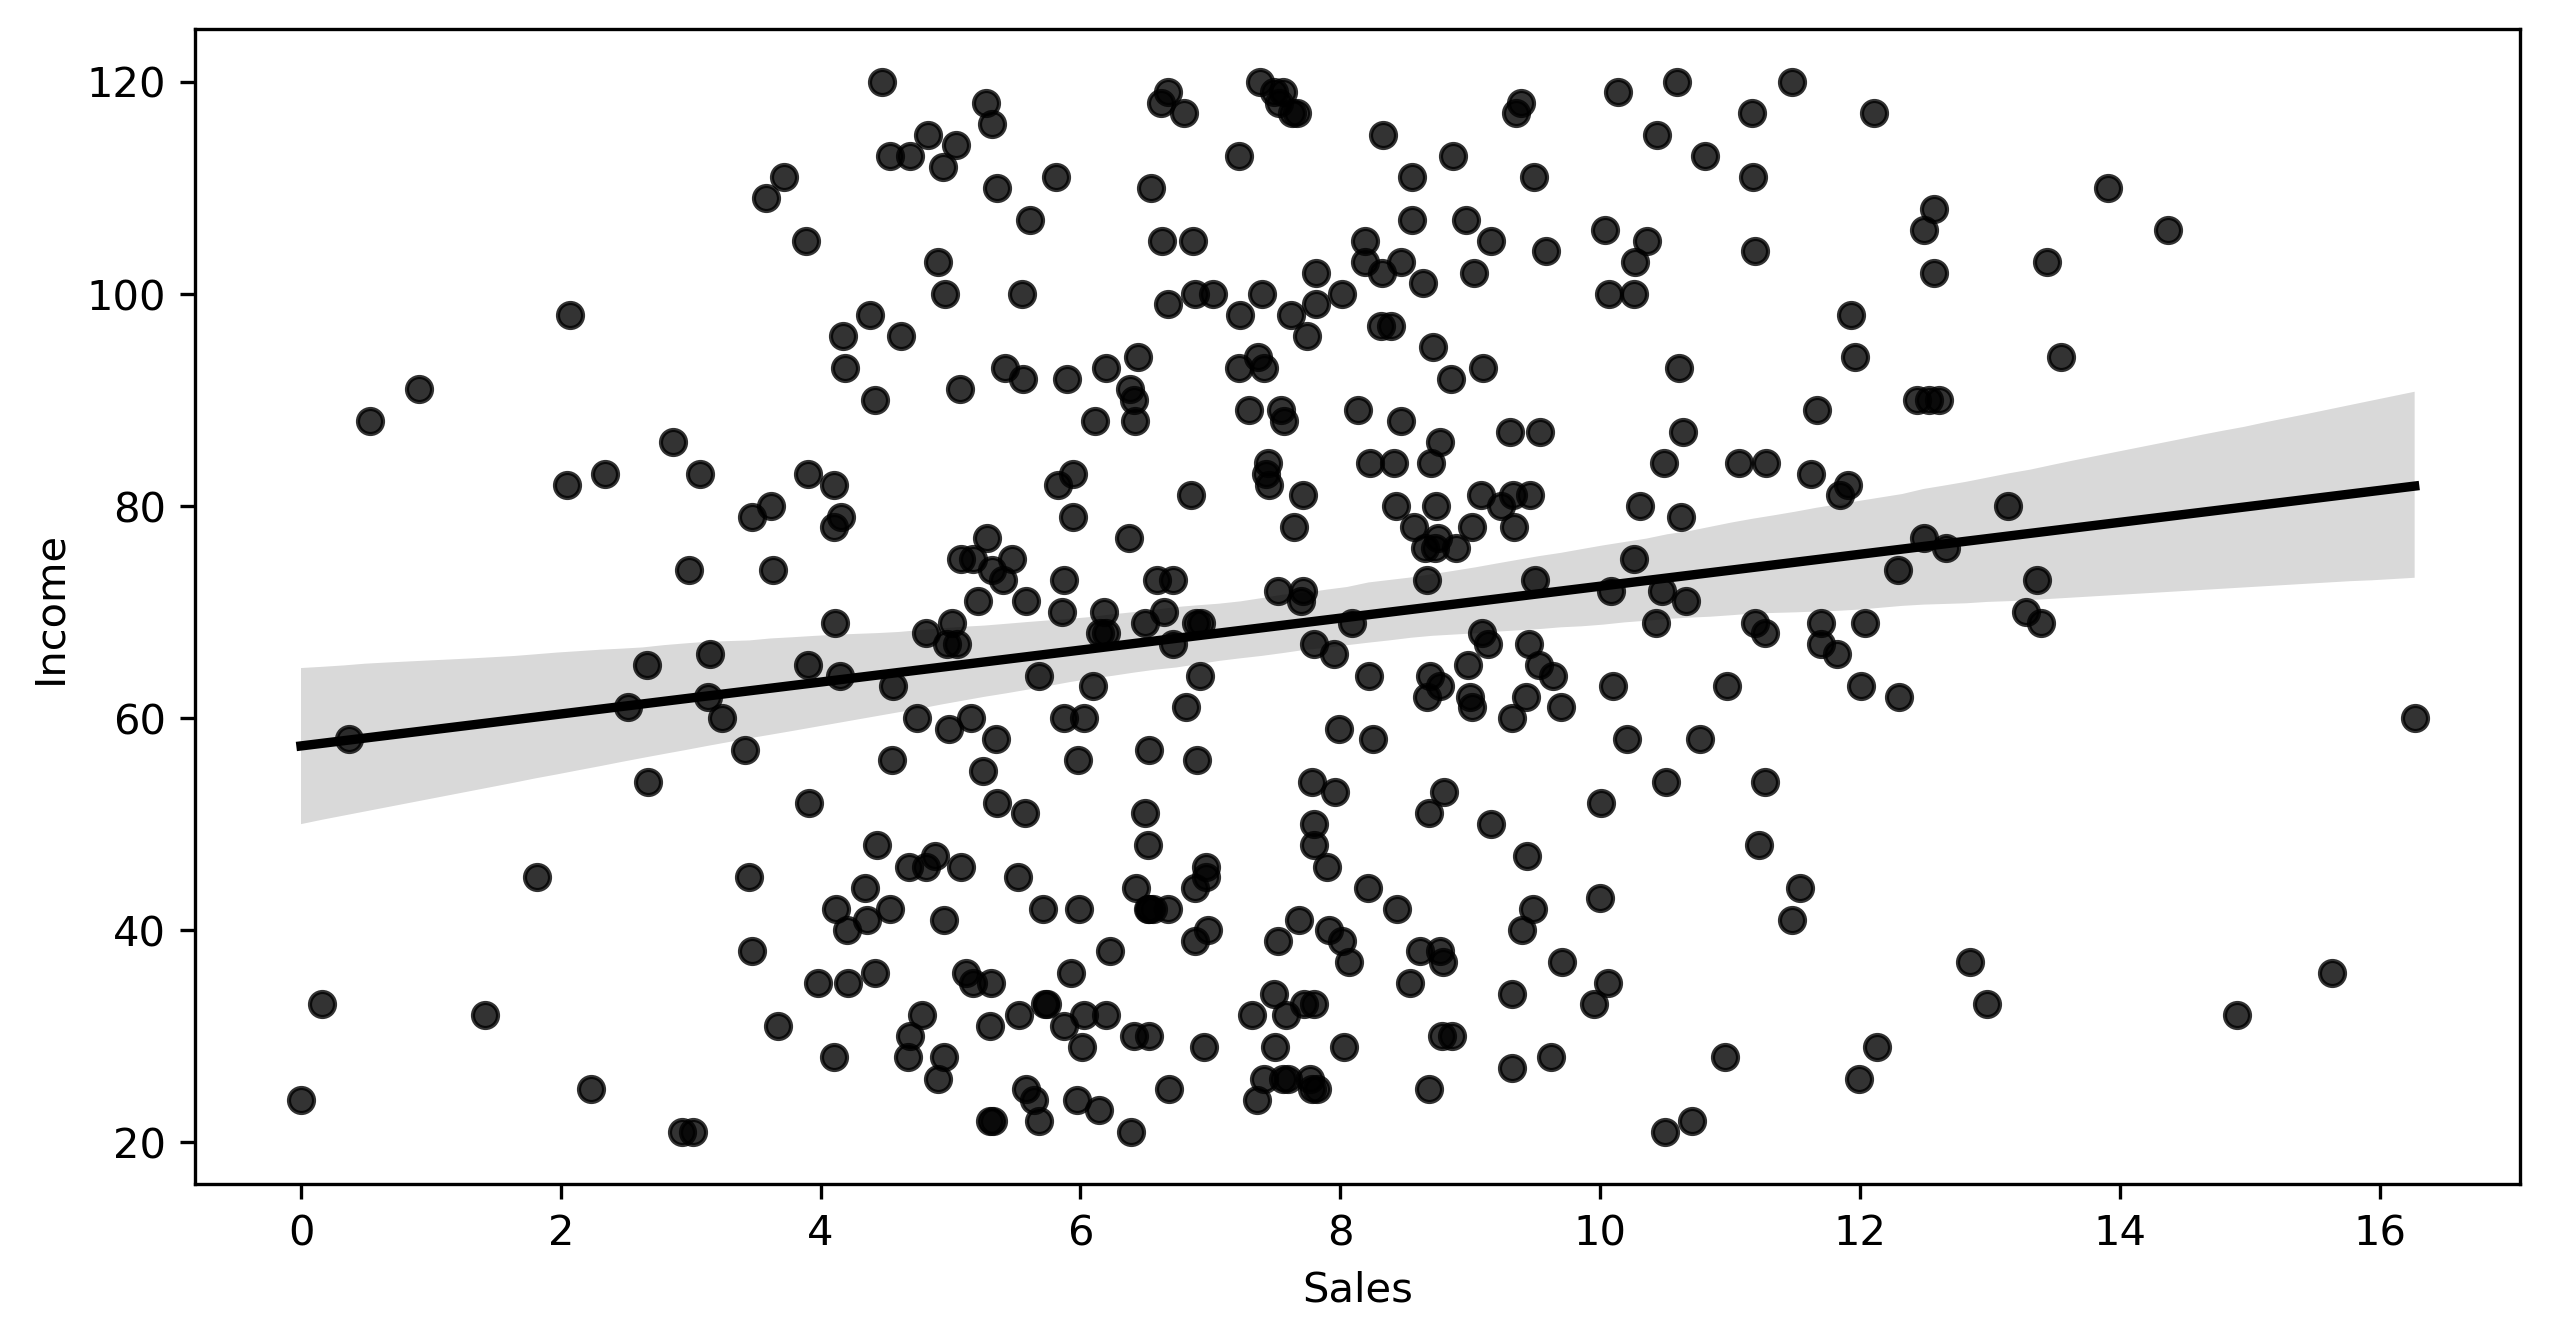

In [122]:
# Regression Plot
sns.regplot(x='Sales', y='Income', data=company, color='black');

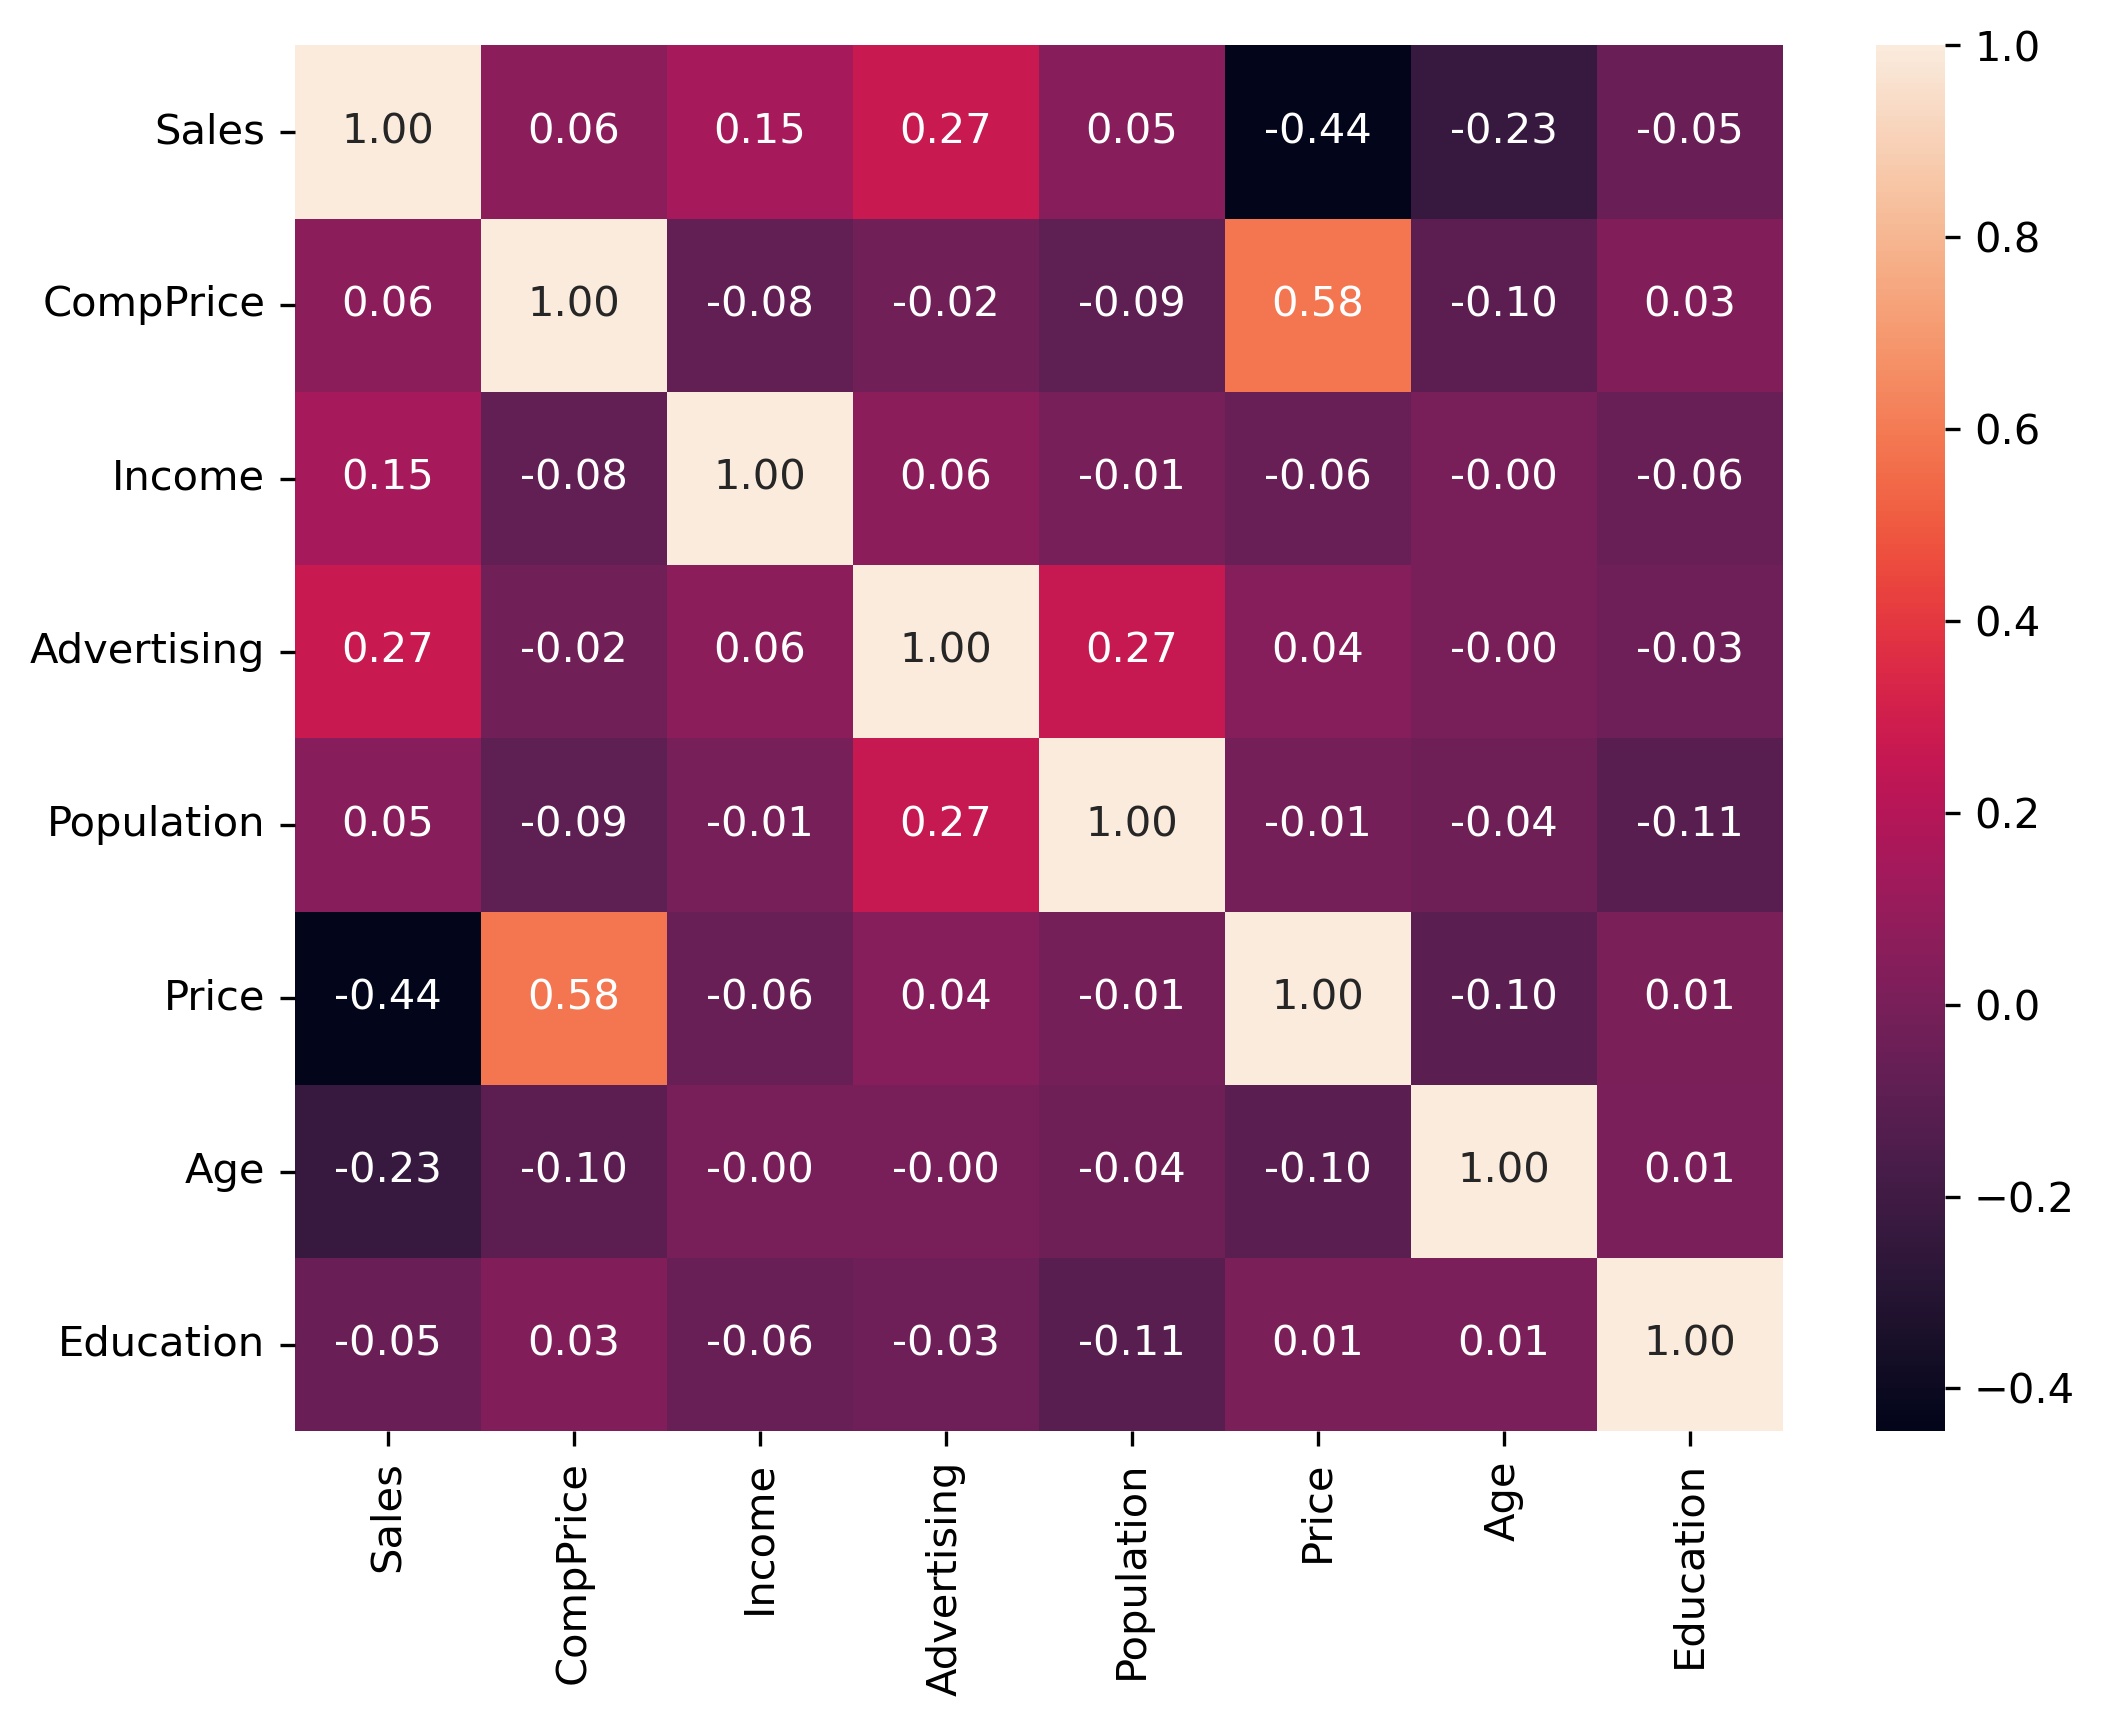

In [123]:
plt.figure(figsize = (8, 6));
sns.heatmap(company.corr(), annot=True, fmt=".2f");

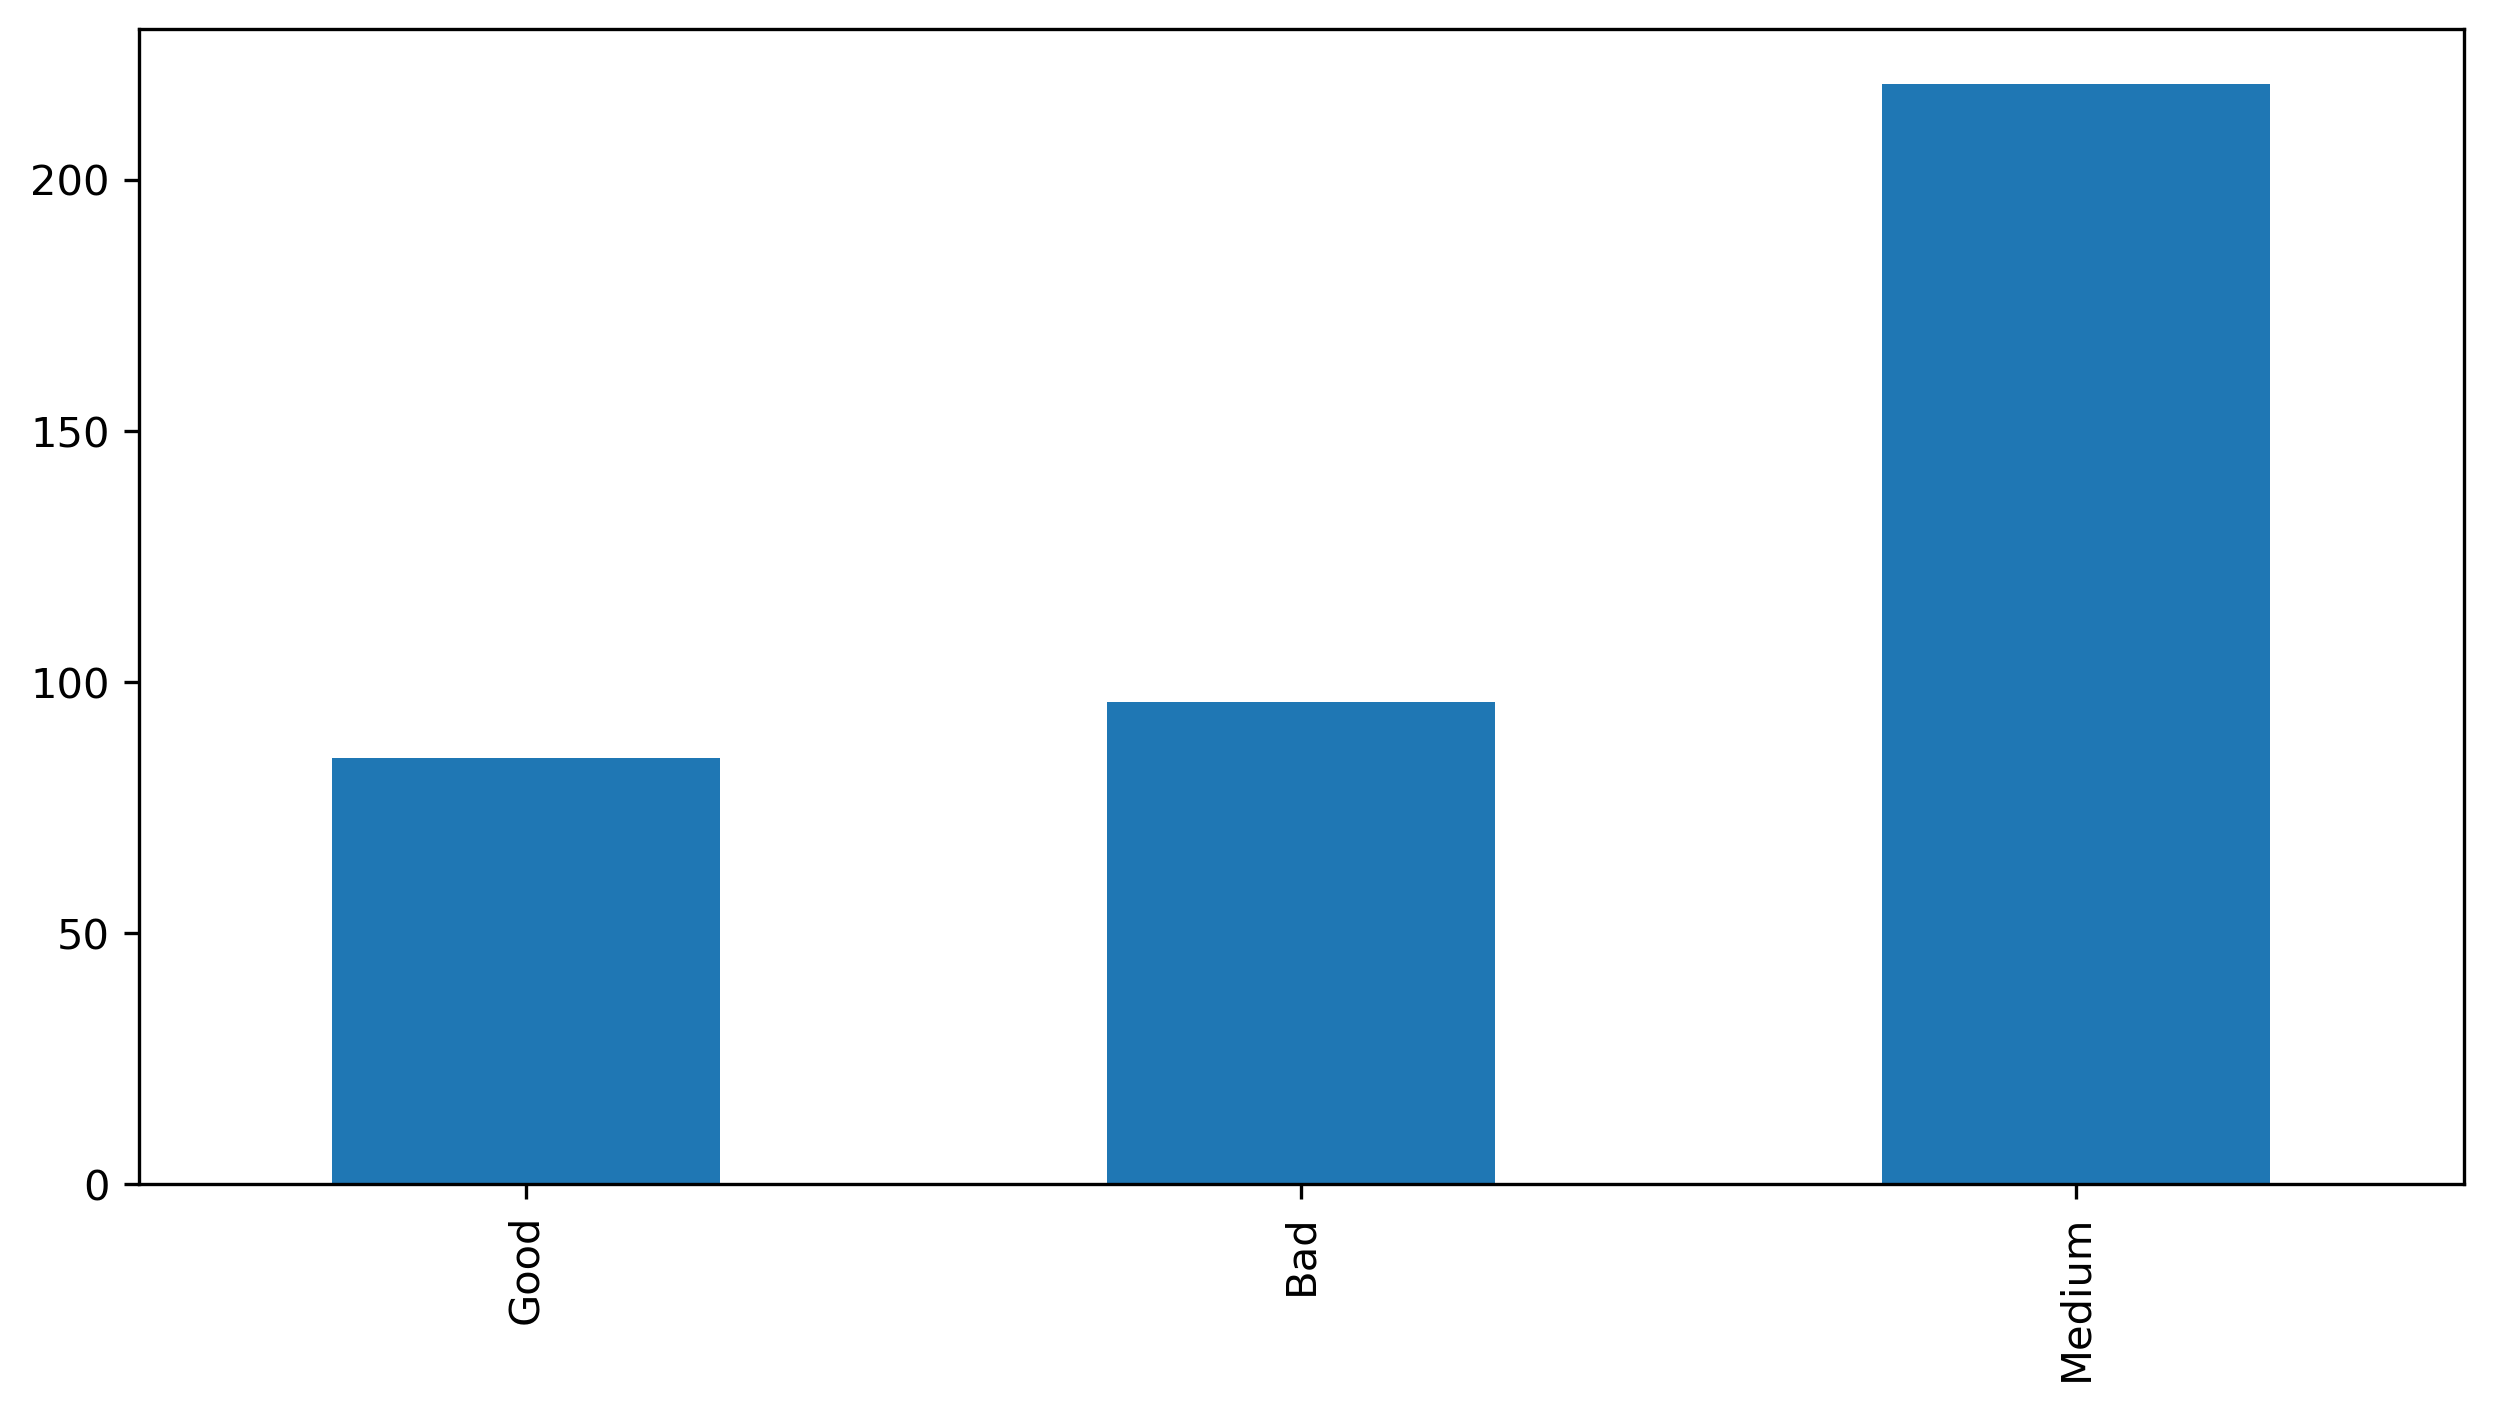

In [124]:
company.ShelveLoc.value_counts(ascending=True).plot(kind='bar');

In [125]:
arr=company.values
arr

array([[9.5, 138, 73, ..., 17, 'Yes', 'Yes'],
       [11.22, 111, 48, ..., 10, 'Yes', 'Yes'],
       [10.06, 113, 35, ..., 12, 'Yes', 'Yes'],
       ...,
       [7.41, 162, 26, ..., 18, 'Yes', 'Yes'],
       [5.94, 100, 79, ..., 12, 'Yes', 'Yes'],
       [9.71, 134, 37, ..., 16, 'Yes', 'Yes']], dtype=object)

In [126]:
X=arr[:,0:6]
Y=arr[:,6]

In [127]:
X

array([[9.5, 138, 73, 11, 276, 120],
       [11.22, 111, 48, 16, 260, 83],
       [10.06, 113, 35, 10, 269, 80],
       ...,
       [7.41, 162, 26, 12, 368, 159],
       [5.94, 100, 79, 7, 284, 95],
       [9.71, 134, 37, 0, 27, 120]], dtype=object)

In [128]:
Y

array(['Bad', 'Good', 'Medium', 'Medium', 'Bad', 'Bad', 'Medium', 'Good',
       'Medium', 'Medium', 'Bad', 'Good', 'Medium', 'Good', 'Good',
       'Medium', 'Good', 'Good', 'Good', 'Medium', 'Medium', 'Good',
       'Medium', 'Medium', 'Bad', 'Good', 'Good', 'Medium', 'Bad', 'Bad',
       'Good', 'Medium', 'Good', 'Good', 'Medium', 'Medium', 'Good',
       'Medium', 'Medium', 'Bad', 'Bad', 'Bad', 'Medium', 'Medium',
       'Medium', 'Bad', 'Medium', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Medium', 'Medium', 'Medium', 'Medium', 'Bad', 'Bad',
       'Medium', 'Bad', 'Medium', 'Bad', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Good', 'Medium', 'Good', 'Medium', 'Medium',
       'Good', 'Medium', 'Bad', 'Medium', 'Medium', 'Medium', 'Bad',
       'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Medium', 'Medium', 'Good',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Bad',
       'Medium', 'Good', 'Bad', 'Good', 'Bad', 'Medium', 'Medium',
       'Medium

# Model Building

In [129]:
kfold=KFold(n_splits=8,shuffle=True)

In [130]:
model=RandomForestClassifier(n_estimators=100,max_features=4)
model

RandomForestClassifier(max_features=4)

In [131]:
fit=model.fit(X,Y)

In [132]:
pred=fit.predict(X)
pred

array(['Bad', 'Good', 'Medium', 'Medium', 'Bad', 'Bad', 'Medium', 'Good',
       'Medium', 'Medium', 'Bad', 'Good', 'Medium', 'Good', 'Good',
       'Medium', 'Good', 'Good', 'Good', 'Medium', 'Medium', 'Good',
       'Medium', 'Medium', 'Bad', 'Good', 'Good', 'Medium', 'Bad', 'Bad',
       'Good', 'Medium', 'Good', 'Good', 'Medium', 'Medium', 'Good',
       'Medium', 'Medium', 'Bad', 'Bad', 'Bad', 'Medium', 'Medium',
       'Medium', 'Bad', 'Medium', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Medium', 'Medium', 'Medium', 'Medium', 'Bad', 'Bad',
       'Medium', 'Bad', 'Medium', 'Bad', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Good', 'Medium', 'Good', 'Medium', 'Medium',
       'Good', 'Medium', 'Bad', 'Medium', 'Medium', 'Medium', 'Bad',
       'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Medium', 'Medium', 'Good',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Bad',
       'Medium', 'Good', 'Bad', 'Good', 'Bad', 'Medium', 'Medium',
       'Medium

In [133]:
results=cross_val_score(model,X,Y,cv=kfold)
results

array([0.68, 0.54, 0.56, 0.6 , 0.64, 0.82, 0.62, 0.64])

In [134]:
results.mean()*100

63.74999999999999